In [40]:
# Perform ANOVA analysis to understand the data before diving in
# Two dirretent ANOVA analysis (Divided India into 4 main regions)
# 1. ANOVA analysis for severly starver by region
# 2. ANOVA analysis for underweigh by region

# Import modules

import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
# Read file
indiaRegions = pd.read_csv('IndiaByRegions.csv')
indiaRegions.head()

,Region,State,Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Severely Wasted (Weight-For-Height) (%),Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Underweight (Weight-For-Age) (%)
0,South,Andhra Pradesh,4.5,31.9
1,South,Andhra Pradesh,4.4,33.1
2,South,Andhra Pradesh,4.8,28.4
3,South,Andhra Pradesh,NaN,NaN
4,East,Assam,6.2,29.8


In [42]:
# Rename Columns to simplify table
indiaRegions.rename(columns={'Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Severely Wasted (Weight-For-Height) (%)':'Severe Malnutrition (%)',
                          'Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Underweight (Weight-For-Age) (%)':'Underweight(%)',
                          }, 
                 inplace=True)

indiaRegions.head()

,Region,State,Severe Malnutrition (%),Underweight(%)
0,South,Andhra Pradesh,4.5,31.9
1,South,Andhra Pradesh,4.4,33.1
2,South,Andhra Pradesh,4.8,28.4
3,South,Andhra Pradesh,NaN,NaN
4,East,Assam,6.2,29.8


In [43]:
# Check how many rows are in the current df
len(indiaRegions)

301

In [44]:
# Check the end of the df
indiaRegions.tail()

,Region,State,Severe Malnutrition (%),Underweight(%)
296,NaN,NaN,NaN,22.6
297,NaN,NaN,NaN,NaN
298,NaN,NaN,NaN,22
299,NaN,NaN,NaN,18.7
300,NaN,NaN,NaN,23.3


In [45]:
# Get rid of all NA values
indiaRegions.dropna()

,Region,State,Severe Malnutrition (%),Underweight(%)
0,South,Andhra Pradesh,4.5,31.9
1,South,Andhra Pradesh,4.4,33.1
2,South,Andhra Pradesh,4.8,28.4
4,East,Assam,6.2,29.8
5,East,Assam,6.4,30.8
...,...,...,...,...
137,South,Lakshadweep,0.0,35.5
138,South,Lakshadweep,3.5,22.6
140,South,Puducherry,7.8,22
141,South,Puducherry,6.4,18.7


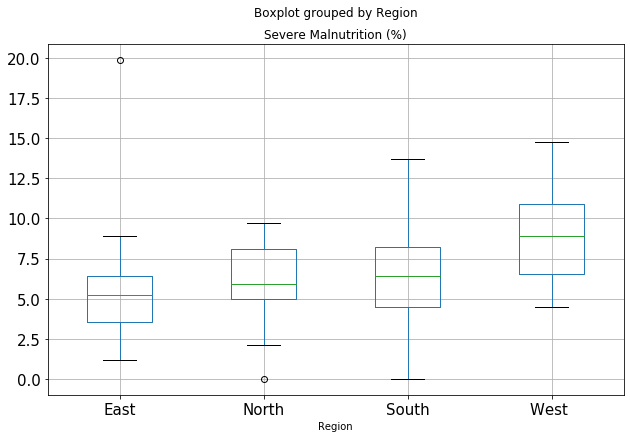

In [46]:
# Create a Box plot of r the first ANOVA (Severe Malnutrition (%))
indiaRegions.boxplot("Severe Malnutrition (%)", by = "Region", fontsize = 15, figsize = (10,6.5))

In [53]:
 # Extract individual groups
group1 = indiaRegions[indiaRegions["Region"] == "East"]["Severe Malnutrition (%)"]
group2 = indiaRegions[indiaRegions["Region"] == "North"]["Severe Malnutrition (%)"]
group3 = indiaRegions[indiaRegions["Region"] == "South"]["Severe Malnutrition (%)"]
group4 = indiaRegions[indiaRegions["Region"] == "West"]["Severe Malnutrition (%)"]


In [54]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=nan, pvalue=nan)